# Проведение и анализ результатов А/В теста

## 1. Описание проекта

**Цель проекта:** анализ и приоритизация списка 9ти гипотез, разработанных с целью увеличения выручки интернет магазина, запуск А/В теста и анализ его результатов

**План работы:**
 - Изучение и предобработка данных
 - Изучение списка гипотез и его приоритезация с помощью фреймворков ICE и RICE
 - Анализ результатов А/В теста
 - Выводы и рекоммендации 

## 2. Приоритизация гипотез

### 2.1 Изучение и предобработка данных

In [1]:
#загрузим данные
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

try:
    hypothesis = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Проекты/7 - АВ тест/hypothesis.csv')

except:
    print('Ошибка при загрузке файла')

In [2]:
#изучим данные
pd.set_option('max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#посмотрим общую информацию по датафрейму
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#переименуем столбцы
hypothesis.columns = hypothesis.columns.str.lower()

### 2.2 Приоритизация гипотез с помощью фреймворка ICE

In [5]:
#применим фреймворк ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод**: Топ-3 самых перспективных гипотез по фреймворку ICE:
 - Номер 8: Запустить акцию, дающую скидку на товар в день рождения
 - Номер 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - Номер 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### 2.3 Приоритизация гипотез с помощью фреймворка RICE

In [6]:
#применим фреймворк RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False).round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Топ-4 самых перспективных гипотез по фреймворку RICE:
 - Номер 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - Номер 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
 - Номер 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - Номер 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
 
Как видим, 7ая и нулевая гипотезы являются наиболее перспективными и по методу ICE, и по методу RICE. 8ая гипотеза не попала в список перспективных по методу RICE, так как у нее очень низкий показатель охвата Reach - всего 1 балл. 7ая гипотеза вышла в лидеры по методу RICE, так как у нее максимальный балл по охвату пользователей, тогда как у нулевой гипотезы оценка параметра Reach гораздо ниже - 3 балла. Также по методу RICE вышли в лидеры гипотезы под номером 2 и 6, которые также попали в топ-5 фреймворка ICE, благодаря высокому охвату пользователей - 8 и 5 баллов соответственно. 

По результатам анализа первой к проверке можно рекомендовать гипотезу номер 7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

## 3. Анализ A/B-теста

### 3.1 Изучение и предобработка данных

#### Данные о заказах

In [7]:
#загрузим данные о заказах
try:
    orders = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Проекты/7 - АВ тест/orders.csv')
except:
    print('Ошибка при загрузке данных')

In [8]:
#изучим данные
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
#посмотрим общую информацию по данным
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#переименуем столбцы
orders = orders.rename(columns={'transactionId': 'order_id', 'visitorId': 'user_id'})

In [11]:
#переведем столбец 'date' в формат datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
#проверим даты эксперимента
orders.groupby('group').agg({'date': ['min', 'max']})

date           
             min        max
group                      
A     2019-08-01 2019-08-31
B     2019-08-01 2019-08-31

In [13]:
#проверим данные на дубликаты
orders.duplicated().sum()

0

In [14]:
#проверим количество пользователей в каждой группе
orders.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,503
B,586


In [15]:
#проверим, есть ли пользователи, попавшие в обе группы
user_a = orders[orders['group'] == 'A']
user_b = orders[orders['group'] == 'B']['user_id']
user_both = user_a.query('user_id in @user_b')
user_both['user_id'].nunique()

58

Количество пользователей в группе В на 16,5% больше, чем в группе А. Также есть 58 пользователей, попавших в обе группы. Скорее всего при сборе данных произошла ошибка. Посмотрим на датасет о визитах, перед тем как принять решение об удалении данных.

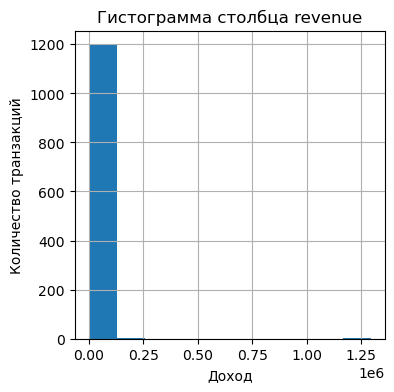

In [16]:
#посторим гистограмму для столбца 'revenue'
orders['revenue'].hist(figsize=(4,4))
plt.xlabel('Доход')
plt.ylabel('Количество транзакций')
plt.title('Гистограмма столбца revenue')
plt.show()

Распределение не похоже на нормальное, однако аномальные значения не видны на графике.Проверим данные на выбросы, построив диаграмму размаха.

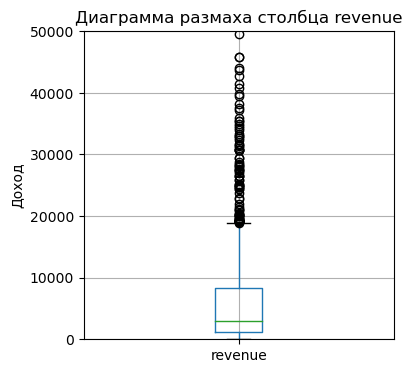

In [17]:
#построим диаграмму размаха
orders.boxplot(column=['revenue'], figsize=(4,4))
plt.ylim(0, 50000)
plt.ylabel('Доход')
plt.title('Диаграмма размаха столбца revenue')
plt.show()

На графике видны выбросы - заказы больше 20тыс., необходимо понять, какие значения являются аномальными и такие аномальные значения нужно будет удалить, чтобы они не повлияли на результаты анализа. Удалим выбросы позже, на этапе анализа.

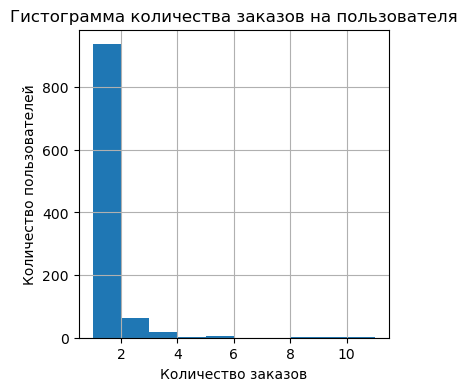

In [42]:
#количество заказов по пользователям
orders_nmb = orders.groupby('user_id', as_index=False).agg({'order_id': 'nunique'})
orders_nmb['order_id'].hist(figsize=(4,4))
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма количества заказов на пользователя')
plt.show()

Большая часть пользователей сделали только один заказ, однако есть пользователи, которые сделали 5 и даже 11 заказов. Такие пользователи могут повлиять на результаты анализа. Определим границы аномалий и отсеим аномальных пользователей на этапе анализа данных.

#### Данные о визитах

In [19]:
#загрузим данные о визитах
try:
    visits = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Проекты/7 - АВ тест/visitors.csv')
except:
    print('Ошибка при загрузке файла')

In [20]:
#изучим данные
visits.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [21]:
#посмотрим общую информацию по данным
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
#переведем столбец 'date' в формат datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [23]:
#проверим даты эксперимента
visits.groupby('group').agg({'date': ['min', 'max']})

date           
             min        max
group                      
A     2019-08-01 2019-08-31
B     2019-08-01 2019-08-31

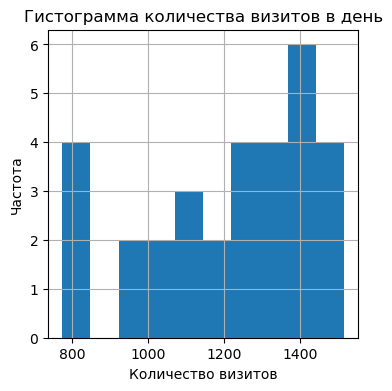

In [45]:
#посторим гистограмму для столбца 'visitors'
sum_visitors = visits.groupby('date').agg({'visitors': 'sum'})
sum_visitors.hist(figsize=(4,4))
plt.xlabel('Количество визитов')
plt.ylabel('Частота')
plt.title('Гистограмма количества визитов в день')
plt.show()

Количество визитов в день колеблется от ~780 до 1500. В целом, никаких аномалий в данных не видно.

**Вывод:** В ходе изучения и подготовки данных были сделаны следующие шаги: 
 - загружены датасеты /datasets/orders.csv и /datasets/visitors.csv
 - пропусков в данных не оказалось
 - названия столбцов были переименованы и приведены к нижнему регистру
 - данные столбцов с информацией о дате и времени были приведены к формату datetime
 - данные были проверены на наличие дубликатов - таковых в данных не оказалось
 - проверены даты эксперимента - данные есть за период с 01.08.2019 до 31.08.2019
 - количество пользователей в группе В на 16,5% больше, чем в группе А. Также есть 58 пользователей, попавших в обе группы. Скорее всего при сборе данных произошла ошибка. Так как в датасете о визитах данные о пользователях агрегированы, было принято решение не удалять данные об этих 58 пользователях из датасета о заказах, чтобы не исказить значения последующих расчетов.
 - были обнаружены аномальные значения в стоимости заказов и количестве заказов на пользователя - такие аномалии необходимо будет удалить на этапе анализа.

### 3.2 График кумулятивной выручки по группам

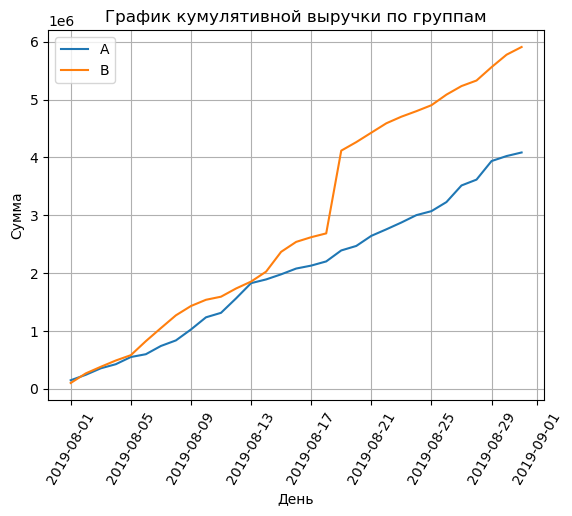

In [25]:
#соберем кумулятивные данные

#создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

#агрегируем значения по заказам
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#агрегируем значения по визитам
visits_aggregated = dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем кумулятивные данные  
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.grid()
plt.xlabel('День')
plt.ylabel('Сумма')
plt.xticks(rotation = 60)
plt.legend()
plt.show()

**Вывод:** Графики выручки обеих групп стабильно растут. На графике видно, что выручка группы В значительно выше, чем у группы А. Однако, можно также заметить очень резкий рост графика В 18ого-19ого августа, что говорит либо о большом увеличении заказов, либо о присутствии очень дорогих заказов. Скорее всего речь об аномальных значениях, которые были обнаружены на этапе предобработки данных. Перед тем как делать вывод об успехе группы В, нужно будет убедиться, что аномалии не влияют на рассчеты. 

### 3.3 График кумулятивного среднего чека по группам

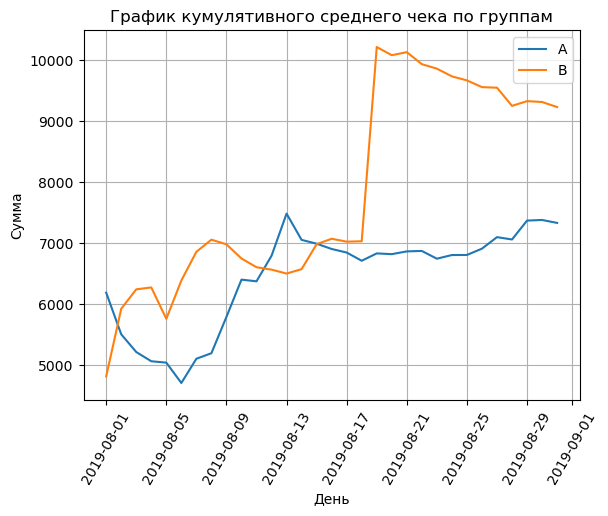

In [26]:
#строим график среднего чека группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
#строим график среднего чека группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.grid()
plt.xlabel('День')
plt.ylabel('Сумма')
plt.xticks(rotation = 60)
plt.legend()
plt.show()

**Вывод:** На графике снова видны резкие скачки, что сигнализирует о выбросах в данных. Средний чек группы А более менее выравнивается после 13ого августа. У среднего чека группы В снова наблюдается очень резкий рост 18ого-19ого - скорее всего так повлияли на график какие-то крупные заказы, после этого график более менее стабилизируется, но заметно его падение. Несмотря на то, что по графику средний чет группы В гораздо выше чека группы А, какие то выводы делать рано, так как на значения очевидно сильно влияют выбросы в данных.

### 3.4 График относительного изменения кумулятивного среднего чека группы B к группе A

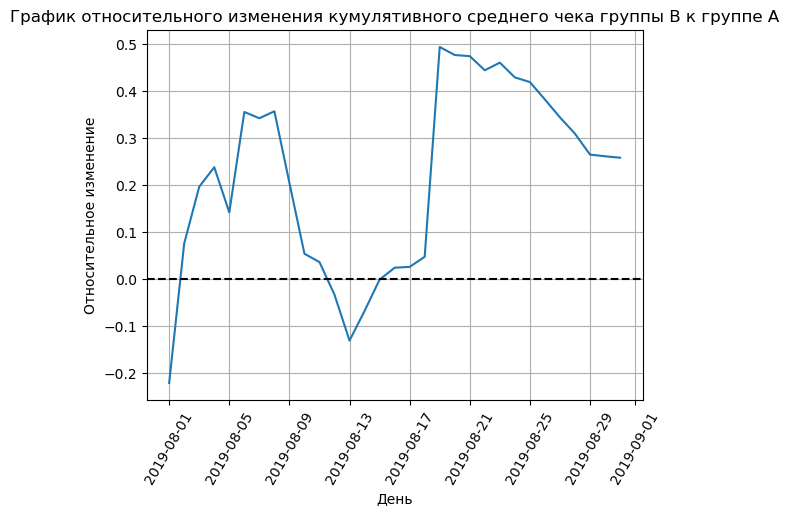

In [27]:
#собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.xlabel('День')
plt.ylabel('Относительное изменение')
plt.xticks(rotation = 60)
plt.show()

**Вывод:** На графике снова наблюдаются резкие скачки, что объясняется выбросами в данных. Группа В снова лучше группы А - самая большая разница наблюдается 18ого-19ого августа, дни в которые в группе В появились крупные заказы. Группа А опережает группу В 13ого августа - день, в который мы видим резкий рост среднего чека группы А на предыдущем графике. 

### 3.5 График кумулятивного среднего количества заказов на посетителя по группам

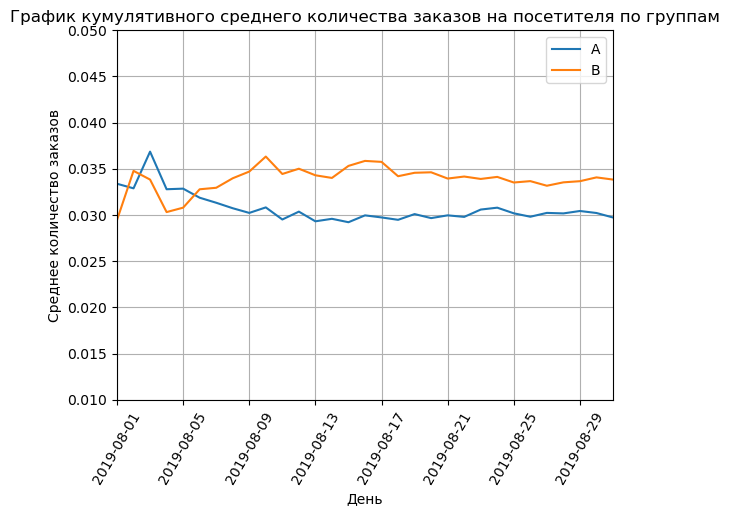

In [28]:
#считаем кумулятивное среднее значение заказов
cumulative_data['orders_avg'] = cumulative_data['orders']/cumulative_data['visitors']

#отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

#отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

#строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['orders_avg'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['orders_avg'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.grid()
plt.xlabel('День')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation = 60)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.01, 0.05])
plt.show()


**Вывод:** В начале теста снова наблюдаем колебания среднего количество заказов для обеих групп. В первые дни группа А имела более высокое количество заказов, однако после 5ого числа группа В выходит вперед. После 17ого числа графики обеих групп выравниваются и группа В имеет стабильно более высокое среднее количество заказов.

### 3.6 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

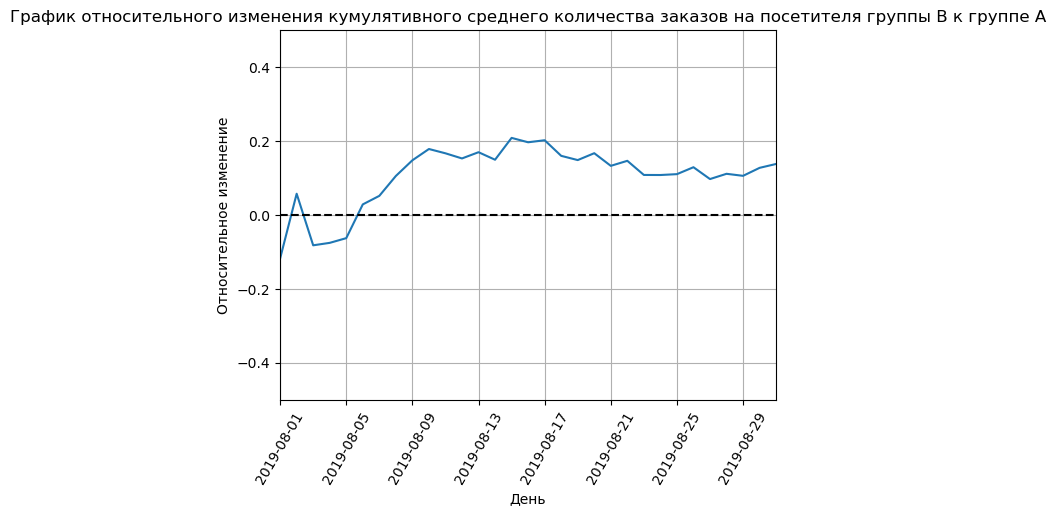

In [29]:
#собираем данные в одном датафрейме
merged_сumulative_orders_avg = cumulative_data_a[['date','orders_avg']].merge(cumulative_data_b[['date','orders_avg']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график
plt.plot(merged_сumulative_orders_avg['date'], merged_сumulative_orders_avg['orders_avgB']/merged_сumulative_orders_avg['orders_avgA']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.grid()
plt.xlabel('День')
plt.ylabel('Относительное изменение')
plt.xticks(rotation = 60)
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.show()

**Вывод:** В первые дни теста среднее количество заказов группы А превышало значения группы В, но после 5ого числа группа В вырывается вперед и стабильно имеет более высокое значение заказов, чем группа А, однако заметны небольшие колебания графика на протяжении всего периода проведения теста.

### 3.7 Точечный график количества заказов по пользователям

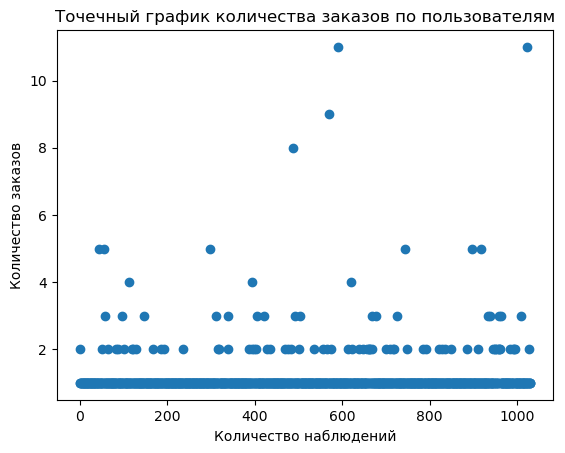

In [30]:
#строим график
x_values = pd.Series(range(0,len(orders_nmb)))
plt.scatter(x_values, orders_nmb['order_id']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество наблюдений')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:** Большая часть пользователей сделали только один заказ, однако доля пользователей, сделавших 2 заказа, тоже значительна. Также есть пользователи, которые сделали больше 10 заказов. Такие пользователи могут сильно повлиять на результаты анализа.

 ### 3.8 95-й и 99-й перцентили количества заказов на пользователя

In [31]:
#посчитаем перцентили количества заказов
print(np.percentile(orders_nmb['order_id'], [95, 97, 99]))

[2. 2. 4.]


**Вывод:** Не более 3% пользователей делали больше 2х заказов и не более 1% пользователя делали больше 4х заказов. Выберем 2 заказа на пользователя за верхную границу и отсеим аномальных пользователей по ней. 

### 3.9 Точечный график стоимостей заказов

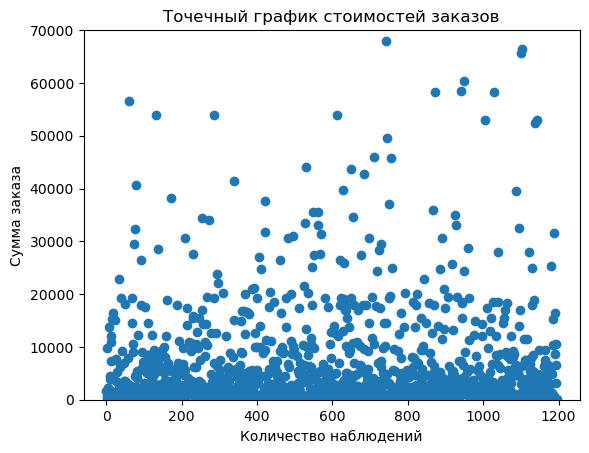

In [32]:
#построим точечный график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,70000)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество наблюдений')
plt.ylabel('Сумма заказа')
plt.show()

**Вывод:** На графике видно, что большая часть заказов стоит менее 10тыс., однако есть значительное количество более дорогих заказов. Такие выбросы могут повлиять на результаты теста. Чтобы понять, что можно взять на границу аномальных значений, посчитаем выборочные перцентили стоимости заказов.

### 3.10 95-й и 99-й перцентили стоимости заказов

In [33]:
#посчитаем 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 97, 99]))

[28000.  35485.  58233.2]


**Вывод:** Не более 5% заказов дороже 28тыс, не более 3% заказов дороже 35485 и не более 1% дороже 58233. Возьмем за верхную границу аномальных значений 97ой перцентиль и отсеим заказы дороже 35500. 

### 3.11 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для определения статистической значимости различий применим непараметрический тест Уилкоксона-Манна-Уитни. Этот тест работает с рангами, никак не учитывая сами значения. Поэтому к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, что и является нашим случаем. 

Сформулируем гипотезы:
 - Нулевая: различий в среднем количестве заказов между группами нет
 - Альтернативная: различия в среднем между группами есть 
 
Зададим критический уровень статистической значимости в 5%

In [34]:
#сделаем срезы данных о визитах по группам
daily_data_a = visits[visits['group'] == 'A']['visitors']
daily_data_b = visits[visits['group'] == 'B']['visitors']

#для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
orders_by_users_a = orders[orders['group'] == 'A'].groupby('user_id', as_index=False).agg({'order_id': pd.Series.nunique})
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = orders[orders['group'] == 'B'].groupby('user_id', as_index=False).agg({'order_id': pd.Series.nunique})
orders_by_users_b.columns = ['user_id', 'orders'] 

#oбъявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(daily_data_a.sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(daily_data_b.sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

#зададим критический уровень статистической значимости
alpha = 0.05 

#применим критерий
results_orders = stats.mannwhitneyu(sample_a, sample_b)
print('p-значение: ', "{0:.3f}".format(results_orders.pvalue))

if results_orders.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

#найдём относительное различие в среднем числе заказов
print('Относительный прирост среднего числа заказов группы B:',"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-значение:  0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост среднего числа заказов группы B: 0.138


**Вывод:** По сырым данным различия в среднем числе заказов для групп А и В есть. Относительный прирост среднего числа заказов группы В к среднему группы А равен 13,8%. 

### 3.12 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке снова применим непараметрический тест Уилкоксона-Манна-Уитни.

- Нулевая гипотеза: различий в среднем чеке между группами нет
- Альтернативная гипотеза: различия в среднем чеке между группами есть

Зададим критический уровень статистической значимости в 5%

In [35]:
#применим непараметрический тест Уилкоксона-Манна-Уитни
alpha = 0.05
results_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: ', "{0:.3f}".format(results_revenue.pvalue))

if results_revenue.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
#найдём относительное различие в среднем чеке между группами
print('Относительное различие в среднем чеке между группами:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное различие в среднем чеке между группами: 0.259


**Вывод:** р-значение значительно больше 0,05, поэтому не получится отвергнуть нулевую гипотезу и считать, что различия в среднем чеке есть. При этом относительое различие среднего чека группы В к группе А довольно большое и равно 25,9%. 

### 3.13 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным 

На этапе изучения данных на наличие выбросов, мы решили взять 2 заказа на пользователя за верхную границу для определения аномальных пользователей и 35500 за верхную границу для определения аномальных заказов, тем самым мы отсеим 3% пользователей с большим числом заказов и 3% дорогих заказов.

In [36]:
#cделаем срез пользователей с числом заказов больше 2
users_with_many_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
    orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']
    ],axis=0,)
#cделаем срез пользователей, совершивших заказы дороже 35500
users_with_expensive_orders = orders[orders['revenue'] > 35500]['user_id']

#oбъединим их
abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())

#узнаем, сколько всего аномальных пользователей 
print('Количество аномальных пользователей:',abnormal_users.shape[0])

Количество аномальных пользователей: 51


In [37]:
#подготовим выборки количества заказов по пользователям по группам теста
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(daily_data_a.sum() - len(orders_by_users_a['orders'])),
        name='orders',),],axis=0,)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(daily_data_b.sum() - len(orders_by_users_b['orders'])),
        name='orders',),],axis=0,)

Применим статистический критерий Манна-Уитни к полученным выборкам.

Сформулируем гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет
- Альтернативная: различия в среднем между группами есть

Зададим критический уровень статистической значимости в 5%

In [38]:
#применим критерий
alpha = 0.05 

results_orders_filtered = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)
print('p-значение: ', "{0:.3f}".format(results_orders_filtered.pvalue))

if results_orders_filtered.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
#найдём относительное различие в среднем числе заказов
print('Относительный прирост среднего числа заказов группы B:',"{0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-значение:  0.010
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост среднего числа заказов группы B: 0.179


**Вывод:** Как и по сырым данным, разница между средним количеством заказов в группа есть, поэтому нулевую гипотезу отвергаем. По очищенным данным относительный прирост среднего числа заказов в группе В к группе А увеличился и составляет 17,9%. 

### 3.14 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Cнова применим непараметрический тест Уилкоксона-Манна-Уитни.

 - Нулевая гипотеза: различий в среднем чеке между группами нет
 - Альтернативная гипотеза: различия в среднем чеке между группами есть

Зададим критический уровень статистической значимости в 5%

In [39]:
alpha = 0.05 

results_revenue_filtered = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                            np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'],
                            orders[np.logical_and(orders['group'] == 'B',
                            np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'],)

print('p-значение: ', "{0:.3f}".format(results_revenue_filtered.pvalue))

if results_revenue_filtered.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
#найдём относительное различие в среднем чеке между группами
print('Относительное различие в среднем чеке между группами:', "{0:.3f}".format(orders[
            np.logical_and(orders['group'] == 'B',np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'].mean() - 1))


p-значение:  0.878
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительное различие в среднем чеке между группами: 0.020


**Вывод:** Как и по сырым данным, по очищенным данным не удалось отвергнуть нулевую гипотезу - статистически значимого различия в среднем чеке между группами нет. При этом относительное различие в среднем чеке по очищенным данным стало составлять всего 2%. 

## 4. Выводы и рекомендации 

**Задача:** анализ и приоритизация списка 9ти гипотез, разработанных с целью увеличения выручки интернет магазина, запуск А/В теста и анализ его результатов

В ходе исследования были сделаны следующие шаги:
1. Был изучен список 9ти гипотез, проведена приоритизация гипотез с помощью фреймворков ICE и RICE. 

Топ-3 самых перспективных гипотез по фреймворку ICE:
 - Номер 8: Запустить акцию, дающую скидку на товар в день рождения
 - Номер 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - Номер 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 
Топ-4 самых перспективных гипотез по фреймворку RICE:
 - Номер 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - Номер 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - Номер 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 - Номер 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

По результатам анализа первой к проверке рекомендована гипотеза номер 7 c максимальный баллом по охвату пользователей - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

2. Были изученны предоставленные датасеты, произведена предобработка данных. В процессе изучения данных было выявлено следующее:
 - пропусков/дубликатов в данных не оказалось
 - проверены даты эксперимента - данные есть за период с 01.08.2019 до 31.08.2019
 - количество пользователей в группе В на 16,5% больше, чем в группе А. Также есть 58 пользователей, попавших в обе группы. Скорее всего при сборе данных произошла ошибка. Так как в датасете о визитах данные о пользователях агрегированы, было принято решение не удалять данные об этих 58 пользователях из датасета о заказах, чтобы не исказить значения последующих расчетов.
 - были обнаружены аномальные значения в стоимости заказов и количестве заказов на пользователя 
 
 
3. Были построены следующие графики: 
 - График кумулятивной выручки по группам : графики выручки обеих групп стабильно растут. Выручка группы В значительно выше группы А, но на графике можно заметить наличие аномальных значений 
 - График кумулятивного среднего чека по группам: по графику средний чет группы В гораздо выше чека группы А, но также видны резкие скачки графиков, поэтому точных выводов сделать нельзя
 - График относительного изменения кумулятивного среднего чека группы B к группе A: группа В снова лучше группы А, но снова наблюдаются резкие скачки 
 - График кумулятивного среднего количества заказов на посетителя по группам: в начале теста наблюдаютя колебания. После 17ого числа графики обеих групп выравниваются и группа В имеет стабильно более высокое среднее количество заказов
 - График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A: после 5ого числа группа В вырывается вперед и стабильно имеет более высокое значение заказов, чем группа А
 - Точечный график количества заказов по пользователям: Большая часть пользователей сделали только один заказ, однако доля пользователей, сделавших 2 заказа, тоже значительна. Также есть пользователи, которые сделали больше 10 заказов
 - Точечный график стоимостей заказов:  На графике видно, что большая часть заказов стоит менее 10тыс., однако есть значительное количество более дорогих заказов
 
 
4. Рассчитана статистическая значимость различий в среднем количестве заказов на посетителя и различий в среднем чеке заказа между группами по «сырым» данным: 

Для определения статистической значимости различий был применен непараметрический тест Уилкоксона-Манна-Уитни. Критический уровень статистической значимости был задан в 5%.

Были сформулированы гипотезы о различии в среднем количестве заказов на посетителя: 
- Нулевая: различий в среднем количестве заказов между группами нет
- Альтернативная: различия в среднем между группами есть

По сырым данным различия в среднем числе заказов для групп А и В есть - нулевая гипотеза была отвергнута. Относительный прирост среднего числа заказов группы В к среднему группы А равен 13,8%.

Были сформулированы гипотезы о различий в среднем чеке заказа между группами:
- Нулевая гипотеза: различий в среднем чеке между группами нет
- Альтернативная гипотеза: различия в среднем чеке между группами есть

По результатам теста, не получилось отвергнуть нулевую гипотезу и считать, что различия в среднем чеке есть. При этом относительое различие среднего чека группы В к группе А довольно большое и равно 25,9%.

5. Рассчитана статистическая значимость различий в среднем количестве заказов на посетителя и различий в среднем чеке заказа между группами по «очищенным» данным:

В результате расчета 95-ого и 99-ого перцентилей количества заказов на пользователя и стоимости заказа, было принято решение взять 2 заказа на пользователя за верхную границу для определения аномальных пользователей и 35500 за верхную границу для определения аномальных заказов, тем самым мы отсеим 3% пользователей с большим числом заказов и 3% дорогих заказов. Количество найденных аномальных пользователей составило 51. 

Для определения статистической значимости различий был снова применен непараметрический тест Уилкоксона-Манна-Уитни с критический уровенем статистической значимости в 5%.

Были сформулированы гипотезы о различии в среднем количестве заказов на посетителя: 
- Нулевая: различий в среднем количестве заказов между группами нет
- Альтернативная: различия в среднем между группами есть

Как и по сырым данным, разница между средним количеством заказов в группах есть, поэтому нулевую гипотезу отвергаем. По очищенным данным относительный прирост среднего числа заказов в группе В к группе А увеличился и составляет 17,9%.

Были сформулированы гипотезы о различий в среднем чеке заказа между группами:
- Нулевая гипотеза: различий в среднем чеке между группами нет
- Альтернативная гипотеза: различия в среднем чеке между группами есть

Как и по сырым данным, по очищенным данным не удалось отвергнуть нулевую гипотезу - статистически значимого различия в среднем чеке между группами нет. При этом относительное различие в среднем чеке по очищенным данным стало составлять всего 2%.

**Рекомендации:** По результатам проведенного анализа было принято решение остановить тест, признать его успешным и зафиксировать победу группы В. Не смотря на то, что различий в среднем чеке между группами нет, наблюдается статистически значимое различие в количесте среднего числа заказов и довольно высокий относительный прирост среднего числа заказов в группе В по сравнению с группой А - 17,9% (по очищенным данным). Увеличение числа заказов, даже при сохранении среднего чека, приведут к увеличению выручки интернет магазина. Рекомендуется применить изменения, которые были совершены для группы В, на всех пользователей. 